# 1 - Packages

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from time import time 
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 2 - Dataset

In [3]:
def loadDatas(direction):
    """
    Loading image datas from the the same folder.

    Arguments:
    direction -- A direction of image data from the same folder.

    Return:
    np.array(imageList) -- Data in the form of numpy.
    """
    imageList=[]
    list = os.listdir(direction)
    for item in list:
        path = os.path.join(direction, item) # 把list裡面的檔名加到路徑
        if(os.path.isfile(path)):
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (512, 256)) # resize到網絡input的shape
            
            imageList.append(img)
    return np.array(imageList)

In [4]:
tic = time()
data = loadDatas(direction = "datasets")
toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')
print ("Shape of data: " + str(data.shape))

execute time: 164.49559259414673 sec
Shape of data: (2176, 256, 512, 3)


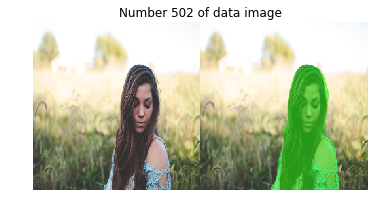

In [5]:
imgIdx = 501
plt.title("Number %d of data image" % (imgIdx + 1))
plt.imshow(data[imgIdx,:,:,:])
plt.axis('off')
plt.show()

In [6]:
def splitData2XY(data):
    """
    Split data into X and Y, because each of image data contain X_train in left half, Y_predic in right half.

    Arguments:
    data -- A dataset from loadDatas

    Return:
    X_pre, Y_pre -- X_pre, Y_pre without preprocessing
    """
    assert np.array([data.shape]).shape == (1, 4)
    X_pre = data[:,:,0:256,:]
    Y_pre = data[:,:,256:512,:]
    
    assert X_pre.shape == (data.shape[0], data.shape[1], data.shape[2]/2,data.shape[3])
    assert Y_pre.shape == (data.shape[0], data.shape[1], data.shape[2]/2,data.shape[3])
    
    return X_pre, Y_pre

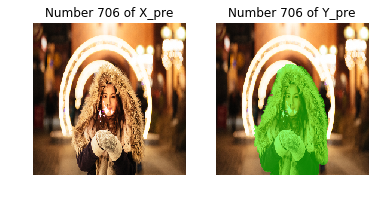

In [7]:
X_pre, Y_pre = splitData2XY(data)

plt.subplot(1,2,1)
imgIdx = 705
plt.title("Number %d of X_pre" % (imgIdx + 1))
plt.imshow(X_pre[imgIdx,:,:,:])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Number %d of Y_pre" % (imgIdx + 1))
plt.imshow(Y_pre[imgIdx,:,:,:])
plt.axis('off')
plt.show()

In [8]:
label = Y_pre[imgIdx,:,:,:] - X_pre[imgIdx,:,:,:]

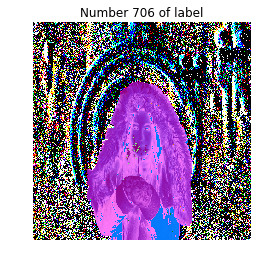

In [9]:
plt.title("Number %d of label" % (imgIdx + 1))
plt.imshow(label)
plt.axis('off')
plt.show()

(800, 1080)


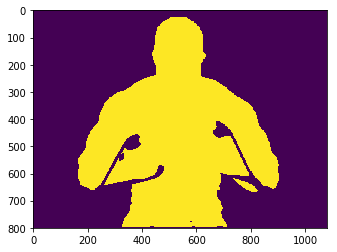

In [22]:
img = cv2.imread('bodybuilder-weight-training-stress-38630.png',0)
print (img.shape)
plt.imshow(img)

# 3 - Create .h5

In [2]:
from time import time 
tic = time()

file = h5py.File('dataset.h5', 'w')
file.create_dataset('X_pre', data = X_pre)
file.create_dataset('Y_pre', data = Y_pre)
file.close()

toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')

NameError: name 'X_pre' is not defined

In [2]:
from time import time 
tic = time()

file = h5py.File('dataset.h5', 'r')
X_pre = file['X_pre'][:]
Y_pre = file['Y_pre'][:]
file.close()

toc = time()
print ('execute time: ' + str((toc - tic)) + ' sec')

OSError: Unable to open file (truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048)

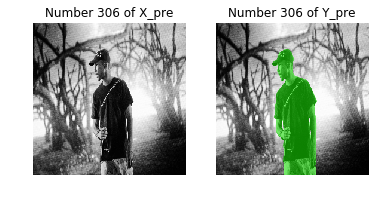

In [4]:
plt.subplot(1,2,1)
imgIdx = 305
plt.title("Number %d of X_pre" % (imgIdx + 1))
plt.imshow(X_pre[imgIdx,:,:,:])
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Number %d of Y_pre" % (imgIdx + 1))
plt.imshow(Y_pre[imgIdx,:,:,:])
plt.axis('off')
plt.show()

In [5]:

for i in range(2176):
    X_pre[i,:,:,:] = cv2.cvtColor(X_pre[i,:,:,:], cv2.COLOR_RGB2BGR)
    Y_pre1 = cv2.cvtColor(Y_pre[i,:,:,:], cv2.COLOR_RGB2GRAY)
    cv2.imwrite(str('image/'+str(i)+'.png'), X_pre[i,:,:,:])
    cv2.imwrite(str('label/'+str(i)+'.png'), Y_pre1)
